In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data_48.csv')

In [3]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [4]:
x=data.drop(['label'], axis=1)
y=data['label']

In [5]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [6]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 47), (1121, 47))

In [7]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 47), (169, 47))

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2024-11-08 04:41:02.125230: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 04:41:02.126695: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 04:41:02.150442: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 04:41:02.150466: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 04:41:02.150487: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [9]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [10]:
model = Sequential([
    Dense(4096, activation='relu'),
    Dropout(0.7),
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, activation='softmax')
])

In [11]:
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,      # Starting learning rate
    decay_steps=1000,         # How often to decay the learning rate
    decay_rate=0.96,            # The decay rate
    staircase=True              # Apply decay in discrete steps
)

# early_stopping = EarlyStopping(monitor='val_loss', patience=70, restore_best_weights=True)

In [12]:
# model.compile(optimizer=SGD(learning_rate=lr_schedule, 
#                             momentum=0.97, 
#                             nesterov=True),  # Enable Nesterov momentum
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [13]:
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                                epochs=500,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/500
41/41 - 2s - loss: 1.9330 - accuracy: 0.2127 - val_loss: 1.8036 - val_accuracy: 0.2752 - 2s/epoch - 44ms/step
Epoch 2/500
41/41 - 1s - loss: 1.7616 - accuracy: 0.3148 - val_loss: 1.6989 - val_accuracy: 0.3424 - 909ms/epoch - 22ms/step
Epoch 3/500
41/41 - 1s - loss: 1.6590 - accuracy: 0.3627 - val_loss: 1.6626 - val_accuracy: 0.3508 - 907ms/epoch - 22ms/step
Epoch 4/500
41/41 - 1s - loss: 1.6174 - accuracy: 0.3757 - val_loss: 1.5994 - val_accuracy: 0.4023 - 905ms/epoch - 22ms/step
Epoch 5/500
41/41 - 1s - loss: 1.5825 - accuracy: 0.3929 - val_loss: 1.5799 - val_accuracy: 0.4317 - 906ms/epoch - 22ms/step
Epoch 6/500
41/41 - 1s - loss: 1.5385 - accuracy: 0.4273 - val_loss: 1.4811 - val_accuracy: 0.4769 - 904ms/epoch - 22ms/step
Epoch 7/500
41/41 - 1s - loss: 1.4485 - accuracy: 0.4575 - val_loss: 1.3986 - val_accuracy: 0.4485 - 906ms/epoch - 22ms/step
Epoch 8/500
41/41 - 1s - loss: 1.4575 - accuracy: 0.4549 - val_loss: 1.3809 - val_accuracy: 0.4601 - 907ms/epoch - 22ms/step
Epo

Epoch 67/500
41/41 - 1s - loss: 0.6678 - accuracy: 0.7689 - val_loss: 0.8382 - val_accuracy: 0.7384 - 1s/epoch - 25ms/step
Epoch 68/500
41/41 - 1s - loss: 0.6843 - accuracy: 0.7678 - val_loss: 0.8092 - val_accuracy: 0.7311 - 1s/epoch - 26ms/step
Epoch 69/500
41/41 - 1s - loss: 0.6337 - accuracy: 0.7854 - val_loss: 0.8377 - val_accuracy: 0.7489 - 1s/epoch - 26ms/step
Epoch 70/500
41/41 - 1s - loss: 0.6732 - accuracy: 0.7598 - val_loss: 0.8664 - val_accuracy: 0.7447 - 1s/epoch - 26ms/step
Epoch 71/500
41/41 - 1s - loss: 0.6683 - accuracy: 0.7708 - val_loss: 0.8206 - val_accuracy: 0.7395 - 1s/epoch - 26ms/step
Epoch 72/500
41/41 - 1s - loss: 0.6350 - accuracy: 0.7796 - val_loss: 0.8071 - val_accuracy: 0.7595 - 1s/epoch - 26ms/step
Epoch 73/500
41/41 - 1s - loss: 0.6308 - accuracy: 0.7900 - val_loss: 0.8244 - val_accuracy: 0.7500 - 1s/epoch - 26ms/step
Epoch 74/500
41/41 - 1s - loss: 0.6634 - accuracy: 0.7689 - val_loss: 0.8398 - val_accuracy: 0.7416 - 1s/epoch - 26ms/step
Epoch 75/500
41/

Epoch 134/500
41/41 - 1s - loss: 0.4055 - accuracy: 0.8688 - val_loss: 0.8954 - val_accuracy: 0.7836 - 1s/epoch - 28ms/step
Epoch 135/500
41/41 - 1s - loss: 0.4271 - accuracy: 0.8615 - val_loss: 0.8705 - val_accuracy: 0.7868 - 1s/epoch - 28ms/step
Epoch 136/500
41/41 - 1s - loss: 0.4115 - accuracy: 0.8634 - val_loss: 0.7948 - val_accuracy: 0.7994 - 1s/epoch - 28ms/step
Epoch 137/500
41/41 - 1s - loss: 0.4217 - accuracy: 0.8676 - val_loss: 0.7847 - val_accuracy: 0.7773 - 1s/epoch - 28ms/step
Epoch 138/500
41/41 - 1s - loss: 0.3752 - accuracy: 0.8680 - val_loss: 0.8666 - val_accuracy: 0.7805 - 1s/epoch - 28ms/step
Epoch 139/500
41/41 - 1s - loss: 0.3990 - accuracy: 0.8753 - val_loss: 0.8103 - val_accuracy: 0.7878 - 1s/epoch - 28ms/step
Epoch 140/500
41/41 - 1s - loss: 0.4283 - accuracy: 0.8550 - val_loss: 0.8575 - val_accuracy: 0.7742 - 1s/epoch - 28ms/step
Epoch 141/500
41/41 - 1s - loss: 0.3993 - accuracy: 0.8741 - val_loss: 0.8425 - val_accuracy: 0.7941 - 1s/epoch - 28ms/step
Epoch 14

41/41 - 1s - loss: 0.3500 - accuracy: 0.8933 - val_loss: 0.9005 - val_accuracy: 0.7910 - 1s/epoch - 28ms/step
Epoch 201/500
41/41 - 1s - loss: 0.3143 - accuracy: 0.8929 - val_loss: 0.9471 - val_accuracy: 0.7952 - 1s/epoch - 29ms/step
Epoch 202/500
41/41 - 1s - loss: 0.2920 - accuracy: 0.9044 - val_loss: 0.8916 - val_accuracy: 0.8057 - 1s/epoch - 29ms/step
Epoch 203/500
41/41 - 1s - loss: 0.2863 - accuracy: 0.9082 - val_loss: 0.9925 - val_accuracy: 0.7889 - 1s/epoch - 29ms/step
Epoch 204/500
41/41 - 1s - loss: 0.3021 - accuracy: 0.9002 - val_loss: 0.8506 - val_accuracy: 0.8099 - 1s/epoch - 29ms/step
Epoch 205/500
41/41 - 1s - loss: 0.3089 - accuracy: 0.8986 - val_loss: 0.8960 - val_accuracy: 0.8057 - 1s/epoch - 29ms/step
Epoch 206/500
41/41 - 1s - loss: 0.2858 - accuracy: 0.9101 - val_loss: 0.8527 - val_accuracy: 0.8109 - 1s/epoch - 29ms/step
Epoch 207/500
41/41 - 1s - loss: 0.2540 - accuracy: 0.9158 - val_loss: 0.9128 - val_accuracy: 0.8120 - 1s/epoch - 29ms/step
Epoch 208/500
41/41 - 

Epoch 267/500
41/41 - 1s - loss: 0.2384 - accuracy: 0.9216 - val_loss: 1.1227 - val_accuracy: 0.7973 - 1s/epoch - 29ms/step
Epoch 268/500
41/41 - 1s - loss: 0.2498 - accuracy: 0.9155 - val_loss: 0.9884 - val_accuracy: 0.8099 - 1s/epoch - 29ms/step
Epoch 269/500
41/41 - 1s - loss: 0.2624 - accuracy: 0.9151 - val_loss: 1.0391 - val_accuracy: 0.7962 - 1s/epoch - 30ms/step
Epoch 270/500
41/41 - 1s - loss: 0.2282 - accuracy: 0.9239 - val_loss: 1.0157 - val_accuracy: 0.8088 - 1s/epoch - 30ms/step
Epoch 271/500
41/41 - 1s - loss: 0.2476 - accuracy: 0.9304 - val_loss: 0.9463 - val_accuracy: 0.8088 - 1s/epoch - 30ms/step
Epoch 272/500
41/41 - 1s - loss: 0.2289 - accuracy: 0.9285 - val_loss: 1.0006 - val_accuracy: 0.8078 - 1s/epoch - 30ms/step
Epoch 273/500
41/41 - 1s - loss: 0.2420 - accuracy: 0.9204 - val_loss: 0.9797 - val_accuracy: 0.8057 - 1s/epoch - 31ms/step
Epoch 274/500
41/41 - 1s - loss: 0.2312 - accuracy: 0.9254 - val_loss: 1.0032 - val_accuracy: 0.8046 - 1s/epoch - 31ms/step
Epoch 27

41/41 - 1s - loss: 0.1709 - accuracy: 0.9384 - val_loss: 1.1386 - val_accuracy: 0.8067 - 1s/epoch - 30ms/step
Epoch 334/500
41/41 - 1s - loss: 0.1921 - accuracy: 0.9376 - val_loss: 1.1031 - val_accuracy: 0.7952 - 1s/epoch - 29ms/step
Epoch 335/500
41/41 - 1s - loss: 0.2233 - accuracy: 0.9319 - val_loss: 1.0652 - val_accuracy: 0.8057 - 1s/epoch - 30ms/step
Epoch 336/500
41/41 - 1s - loss: 0.2006 - accuracy: 0.9334 - val_loss: 1.0736 - val_accuracy: 0.8057 - 1s/epoch - 29ms/step
Epoch 337/500
41/41 - 1s - loss: 0.1992 - accuracy: 0.9388 - val_loss: 1.0798 - val_accuracy: 0.8046 - 1s/epoch - 29ms/step
Epoch 338/500
41/41 - 1s - loss: 0.1675 - accuracy: 0.9445 - val_loss: 1.1379 - val_accuracy: 0.8109 - 1s/epoch - 30ms/step
Epoch 339/500
41/41 - 1s - loss: 0.2048 - accuracy: 0.9430 - val_loss: 1.1410 - val_accuracy: 0.8004 - 1s/epoch - 29ms/step
Epoch 340/500
41/41 - 1s - loss: 0.1942 - accuracy: 0.9376 - val_loss: 1.0911 - val_accuracy: 0.7983 - 1s/epoch - 29ms/step
Epoch 341/500
41/41 - 

Epoch 400/500
41/41 - 1s - loss: 0.1709 - accuracy: 0.9461 - val_loss: 1.1980 - val_accuracy: 0.8193 - 1s/epoch - 30ms/step
Epoch 401/500
41/41 - 1s - loss: 0.2027 - accuracy: 0.9346 - val_loss: 1.2258 - val_accuracy: 0.8078 - 1s/epoch - 29ms/step
Epoch 402/500
41/41 - 1s - loss: 0.1812 - accuracy: 0.9384 - val_loss: 1.2566 - val_accuracy: 0.8141 - 1s/epoch - 31ms/step
Epoch 403/500
41/41 - 1s - loss: 0.1703 - accuracy: 0.9457 - val_loss: 1.1352 - val_accuracy: 0.8141 - 1s/epoch - 31ms/step
Epoch 404/500
41/41 - 1s - loss: 0.1869 - accuracy: 0.9434 - val_loss: 1.0659 - val_accuracy: 0.8141 - 1s/epoch - 30ms/step
Epoch 405/500
41/41 - 1s - loss: 0.1611 - accuracy: 0.9396 - val_loss: 1.0737 - val_accuracy: 0.8256 - 1s/epoch - 29ms/step
Epoch 406/500
41/41 - 1s - loss: 0.1475 - accuracy: 0.9503 - val_loss: 1.1896 - val_accuracy: 0.8225 - 1s/epoch - 30ms/step
Epoch 407/500
41/41 - 1s - loss: 0.1665 - accuracy: 0.9491 - val_loss: 1.1868 - val_accuracy: 0.8120 - 1s/epoch - 29ms/step
Epoch 40

41/41 - 1s - loss: 0.1650 - accuracy: 0.9464 - val_loss: 1.2177 - val_accuracy: 0.8078 - 1s/epoch - 30ms/step
Epoch 467/500
41/41 - 1s - loss: 0.1343 - accuracy: 0.9610 - val_loss: 1.2975 - val_accuracy: 0.8225 - 1s/epoch - 29ms/step
Epoch 468/500
41/41 - 1s - loss: 0.1615 - accuracy: 0.9583 - val_loss: 1.1777 - val_accuracy: 0.8162 - 1s/epoch - 30ms/step
Epoch 469/500
41/41 - 1s - loss: 0.1440 - accuracy: 0.9518 - val_loss: 1.2281 - val_accuracy: 0.8130 - 1s/epoch - 29ms/step
Epoch 470/500
41/41 - 1s - loss: 0.1453 - accuracy: 0.9606 - val_loss: 1.2814 - val_accuracy: 0.8099 - 1s/epoch - 31ms/step
Epoch 471/500
41/41 - 1s - loss: 0.1453 - accuracy: 0.9552 - val_loss: 1.1884 - val_accuracy: 0.8130 - 1s/epoch - 32ms/step
Epoch 472/500
41/41 - 1s - loss: 0.1562 - accuracy: 0.9579 - val_loss: 1.0306 - val_accuracy: 0.8151 - 1s/epoch - 30ms/step
Epoch 473/500
41/41 - 1s - loss: 0.1548 - accuracy: 0.9526 - val_loss: 1.1234 - val_accuracy: 0.8256 - 1s/epoch - 30ms/step
Epoch 474/500
41/41 - 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              196608    
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              4195328   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

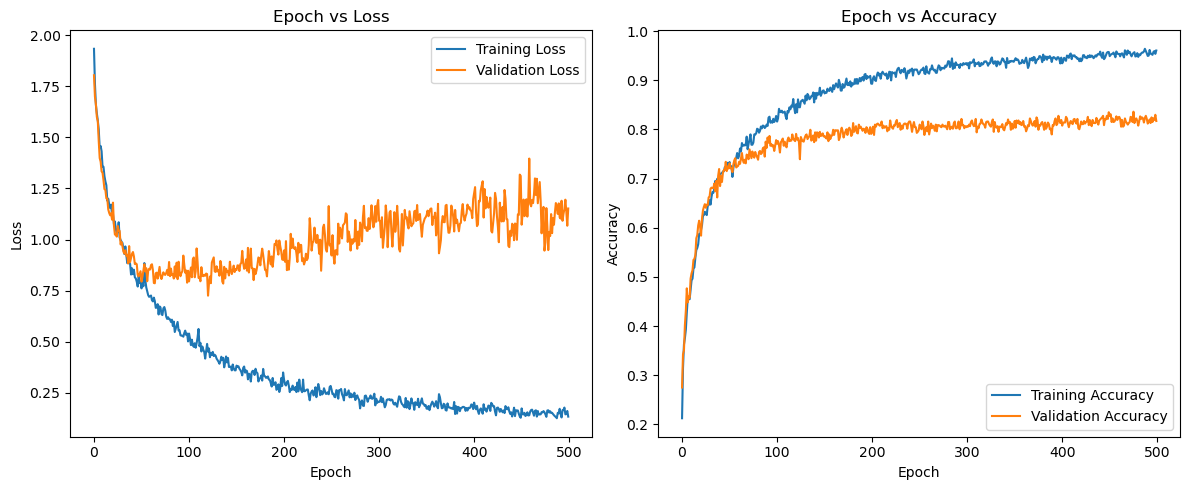

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.81%
Test Accuracy: 79.29%


6/6 [==============================] - 0s 4ms/step


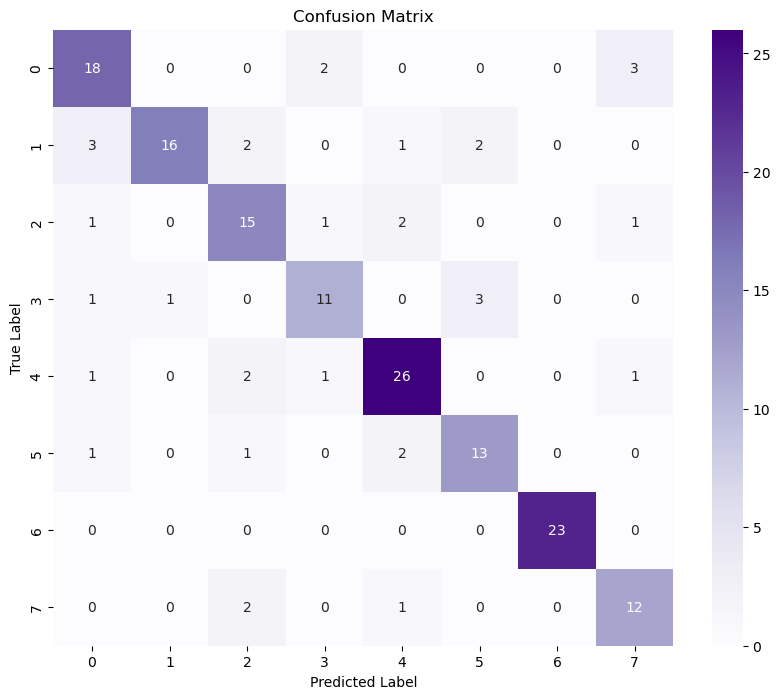

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        23
           1       0.94      0.67      0.78        24
           2       0.68      0.75      0.71        20
           3       0.73      0.69      0.71        16
           4       0.81      0.84      0.83        31
           5       0.72      0.76      0.74        17
           6       1.00      1.00      1.00        23
           7       0.71      0.80      0.75        15

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.78       169
weighted avg       0.80      0.79      0.79       169



In [18]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)
